# LGM VIP 2021
##DATA ANALYTCS
###TASK 2 : Image to Pencil Sketch with Python
**Author [Mrutyunjay Rout](https://www.linkedin.com/in/routmj7/)**

**Task Description :**

As a security/defense analyst, try to find out the hot zone of terrorism.

You can choose any of the tool of your choice  

(Python/R/Tableau/PowerBI/Excel/SAP/SAS) 

Dataset: https://bit.ly/2TK5Xn5

## Importing Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [ ]:
#Go to the side bar on the left, then click on files, then click on mount drive OR run this code

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
path="/content/drive/MyDrive/csv/globalterrorismdb_0718dist.csv"
df=pd.read_csv(path, encoding="latin1")
#df is for data frame

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##Basic Information

In [66]:
df

,Year,Month,Day,Extended,Country,Region,State,Group,City,Latitude,Longitude,AttackType,Killed,Wounded,Summary,Target
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,MANO-D,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,NaN,Julio Guzman
1,1970,0,0,0,Mexico,North America,Federal,23rd of September Communist League,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,NaN,"Nadine Chaval, daughter"
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,Unknown,15.478598,120.599741,Assassination,1.0,0.0,NaN,Employee
3,1970,1,0,0,Greece,Western Europe,Attica,Unknown,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy
4,1970,1,0,0,Japan,East Asia,Fukouka,Unknown,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Al-Shabaab,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Checkpoint
181687,2017,12,31,0,Syria,Middle East & North Africa,Lattakia,Muslim extremists,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Hmeymim Air Base
181688,2017,12,31,0,Philippines,Southeast Asia,Maguindanao,Bangsamoro Islamic Freedom Movement (BIFM),Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Houses
181689,2017,12,31,0,India,South Asia,Manipur,Unknown,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Office


In [67]:
df.shape

(181691, 16)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Extended    181691 non-null  int64  
 4   Country     181691 non-null  object 
 5   Region      181691 non-null  object 
 6   State       181270 non-null  object 
 7   Group       181691 non-null  object 
 8   City        181257 non-null  object 
 9   Latitude    177135 non-null  float64
 10  Longitude   177134 non-null  float64
 11  AttackType  181691 non-null  object 
 12  Killed      171378 non-null  float64
 13  Wounded     165380 non-null  float64
 14  Summary     115562 non-null  object 
 15  Target      181055 non-null  object 
dtypes: float64(4), int64(4), object(8)
memory usage: 22.2+ MB


In [69]:
df.describe()

,Year,Month,Day,Extended,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [70]:
df.value_counts

<bound method DataFrame.value_counts of         Year  ...                   Target
0       1970  ...             Julio Guzman
1       1970  ...  Nadine Chaval, daughter
2       1970  ...                 Employee
3       1970  ...             U.S. Embassy
4       1970  ...           U.S. Consulate
...      ...  ...                      ...
181686  2017  ...               Checkpoint
181687  2017  ...         Hmeymim Air Base
181688  2017  ...                   Houses
181689  2017  ...                   Office
181690  2017  ...                  Unknown

[181691 rows x 16 columns]>

In [71]:
df.isnull().sum()

Year              0
Month             0
Day               0
Extended          0
Country           0
Region            0
State           421
Group             0
City            434
Latitude       4556
Longitude      4557
AttackType        0
Killed        10313
Wounded       16311
Summary       66129
Target          636
dtype: int64

##Filtering the required columns for exploratory analysis

###Renaming the columns

In [89]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country','region_txt':'Region','provstate':'State','gname':'Group','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','nkill':'Killed','nwound':'Wounded','summary':'Summary','target1':'Target'},inplace=True)

###Filtering Required Columns

In [90]:
df=df[['Year','Month','Day','Extended','Country','Region','State','Group','City','Latitude','Longitude','AttackType','Killed','Wounded','Summary','Target']]

In [91]:
df.head()

,Year,Month,Day,Extended,Country,Region,State,Group,City,Latitude,Longitude,AttackType,Killed,Wounded,Summary,Target
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,MANO-D,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,NaN,Julio Guzman
1,1970,0,0,0,Mexico,North America,Federal,23rd of September Communist League,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,NaN,"Nadine Chaval, daughter"
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,Unknown,15.478598,120.599741,Assassination,1.0,0.0,NaN,Employee
3,1970,1,0,0,Greece,Western Europe,Attica,Unknown,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy
4,1970,1,0,0,Japan,East Asia,Fukouka,Unknown,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate


In [92]:
print("Country with most terrorist attacks:", df.Country.value_counts().idxmax())
print("Region with most terrorist attacks:", df.Region.value_counts().idxmax())
print("State with most terrorist attacks:", df.State.value_counts().idxmax())
print("City with most terrorist attacks:", df.City.value_counts().idxmax())
print("Group with most terrorist attacks:", df.Group.value_counts().idxmax())

Country with most terrorist attacks: Iraq
Region with most terrorist attacks: Middle East & North Africa
State with most terrorist attacks: Baghdad
City with most terrorist attacks: Unknown
Group with most terrorist attacks: Unknown


####Corelation between different features

In [93]:
feat_corr=df.corr()
print(feat_corr)

               Year     Month       Day  ...  Longitude    Killed   Wounded
Year       1.000000  0.000139  0.018254  ...   0.003917  0.015341  0.015273
Month      0.000139  1.000000  0.005497  ...  -0.003880  0.003463  0.002938
Day        0.018254  0.005497  1.000000  ...  -0.002285 -0.003693 -0.001268
Extended   0.091754 -0.000468 -0.004700  ...   0.000523  0.027737 -0.006627
Latitude   0.166933 -0.015978  0.003423  ...   0.001463 -0.018124  0.015988
Longitude  0.003917 -0.003880 -0.002285  ...   1.000000 -0.000562  0.000223
Killed     0.015341  0.003463 -0.003693  ...  -0.000562  1.000000  0.534375
Wounded    0.015273  0.002938 -0.001268  ...   0.000223  0.534375  1.000000

[8 rows x 8 columns]


##Data Visualisation

###Analysing terrorist activities each year


####barplot

Text(0.5, 1.0, 'No. of terrorist activities every year')

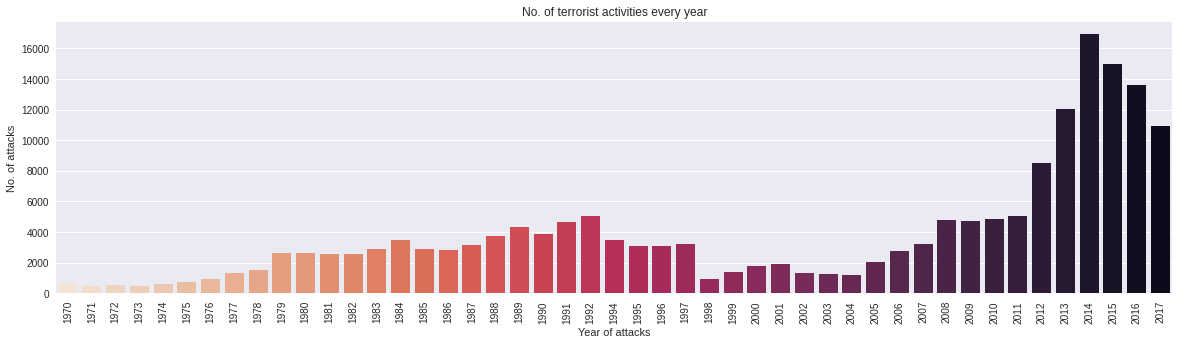

In [77]:
plt.subplots(figsize=(20,5))
sns.countplot(x='Year',data=df,palette='rocket_r')
plt.xticks(rotation=90)
plt.xlabel('Year of attacks')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities every year')

**We see that the The Terrorist Attack is highest in 2014 followed by 2015 and 2016 and minimum was in 1971**

####Histogram

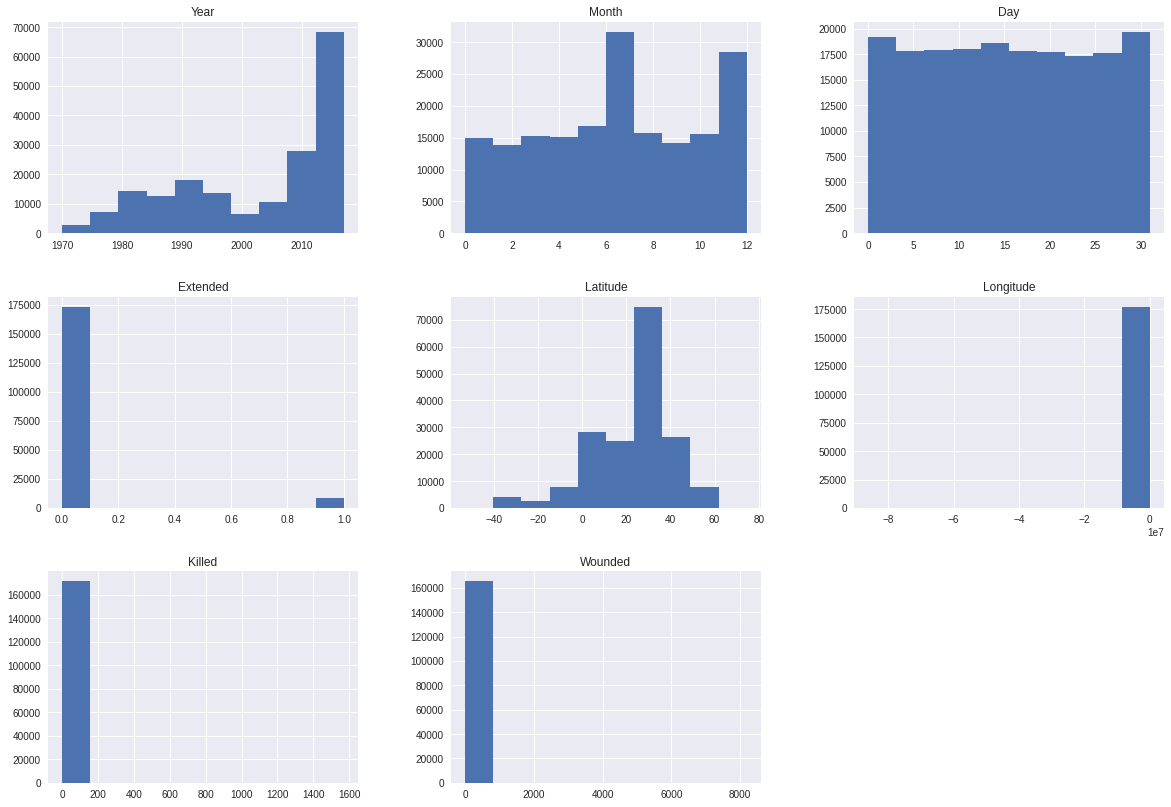

In [78]:
df.hist(figsize=(20,14))
plt.show()

####Boxplot

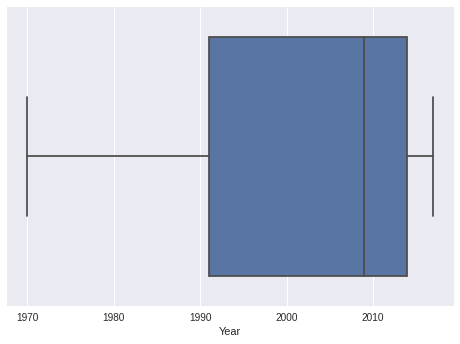

In [79]:
sns.boxplot(x=df['Year'])

####Violin Plot

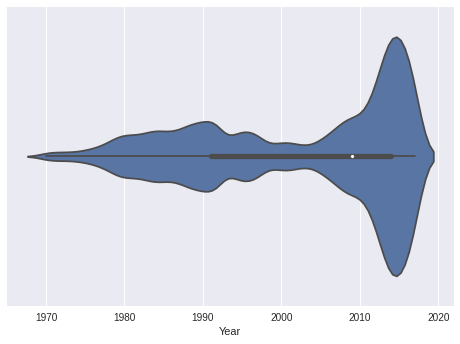

In [80]:
sns.violinplot(x=df['Year'])

###Regions affected with Terrorist activities

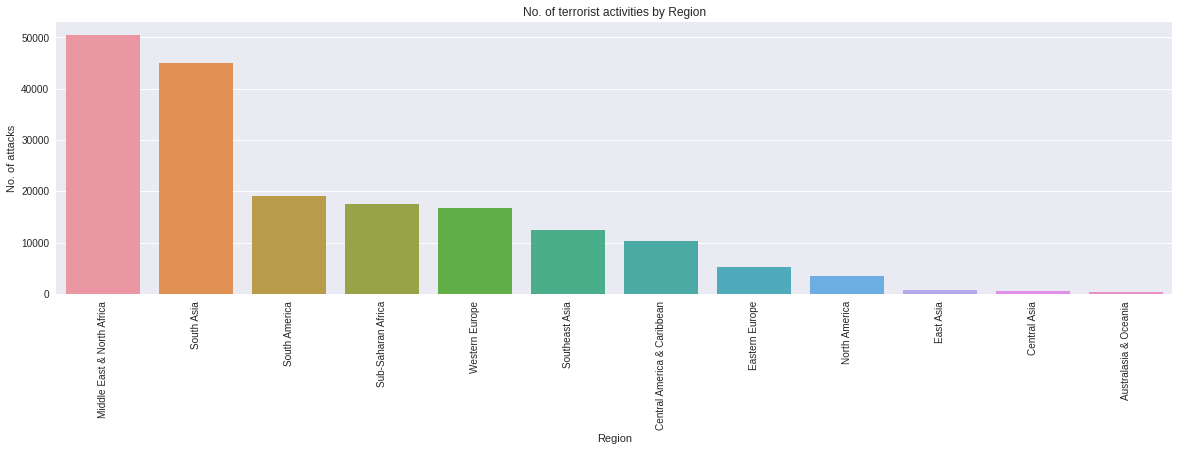

In [81]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Region'].value_counts().index,y=df['Region'].value_counts().values)
plt.xlabel('Region')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities by Region')
plt.show()

Middle East & North Africa is the region with most terrorist attacks.

####Countries affected with Terrorist activities 
Top 30

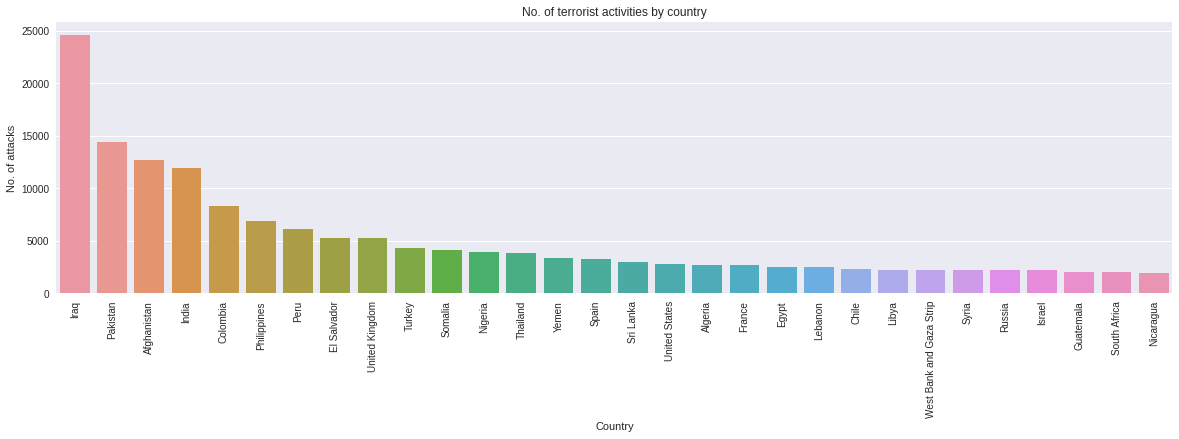

In [82]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Country'].value_counts()[:30].index,y=df['Country'].value_counts()[:30].values)
plt.xlabel('Country')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities by country')
plt.show()

Iraq is the country with most terrorist attacks.

####Cities affected with Terrorist activities

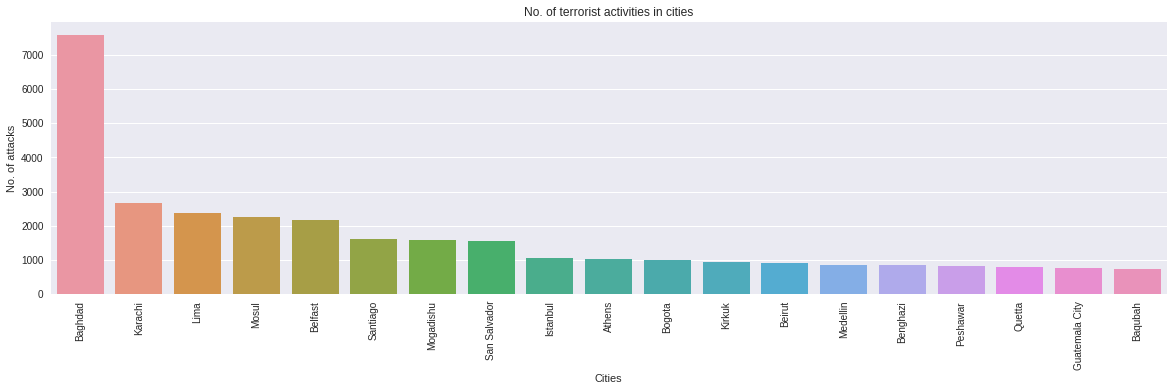

In [83]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(y=df["City"].value_counts()[1:20].values,x=df["City"].value_counts()[1:20].index);
plt.xlabel('Cities')
plt.ylabel('No. of attacks')
plt.title('No. of terrorist activities in cities')
plt.show()

Baghdad is the city with most terrorist attacks

###Analysing Active terrorist Groups

Text(0.5, 1.0, 'Active Terrorist Groups')

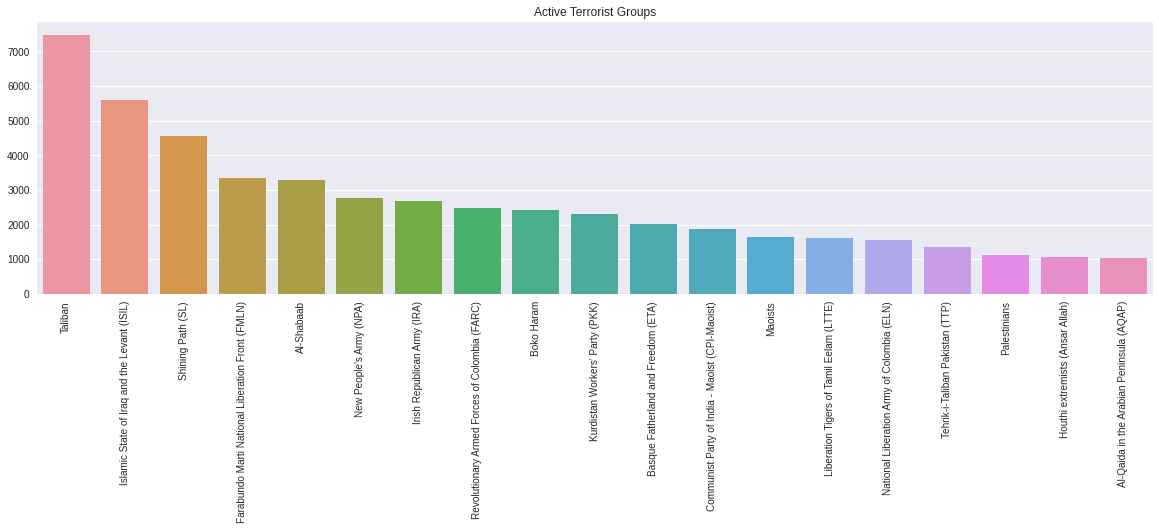

In [84]:
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Group'].value_counts()[1:20].index,y=df['Group'].value_counts()[1:20].values)
plt.title("Active Terrorist Groups")

Taliban is the most active known Terrorist group

###Number of deaths every year

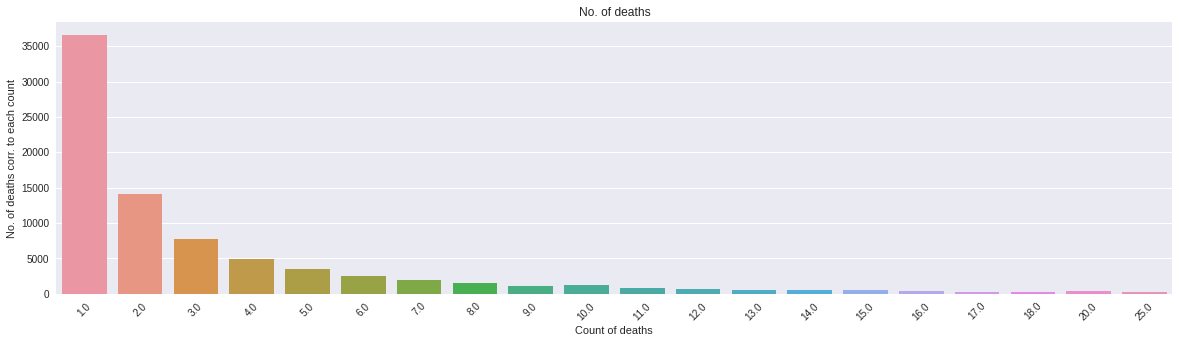

In [85]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x=df['Killed'].value_counts()[1:25].index,y=df['Killed'].value_counts()[1:25].values)
plt.xlabel('Count of deaths')
plt.ylabel('No. of deaths corr. to each count')
plt.title('No. of deaths')
plt.show()

###Number of injuries every year

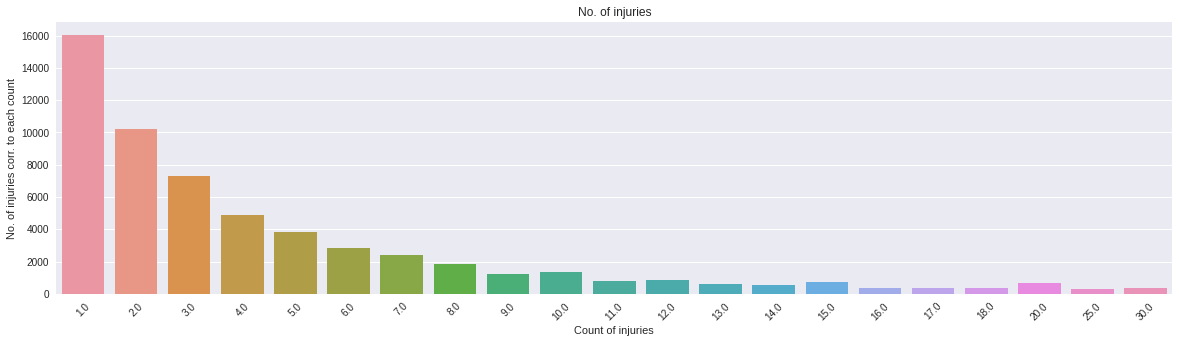

In [86]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(x=df['Wounded'].value_counts()[1:25].index,y=df['Wounded'].value_counts()[1:25].values)
plt.xlabel('Count of injuries')
plt.ylabel('No. of injuries corr. to each count')
plt.title('No. of injuries')
plt.show()

###Different Types of Terrorist Attacks

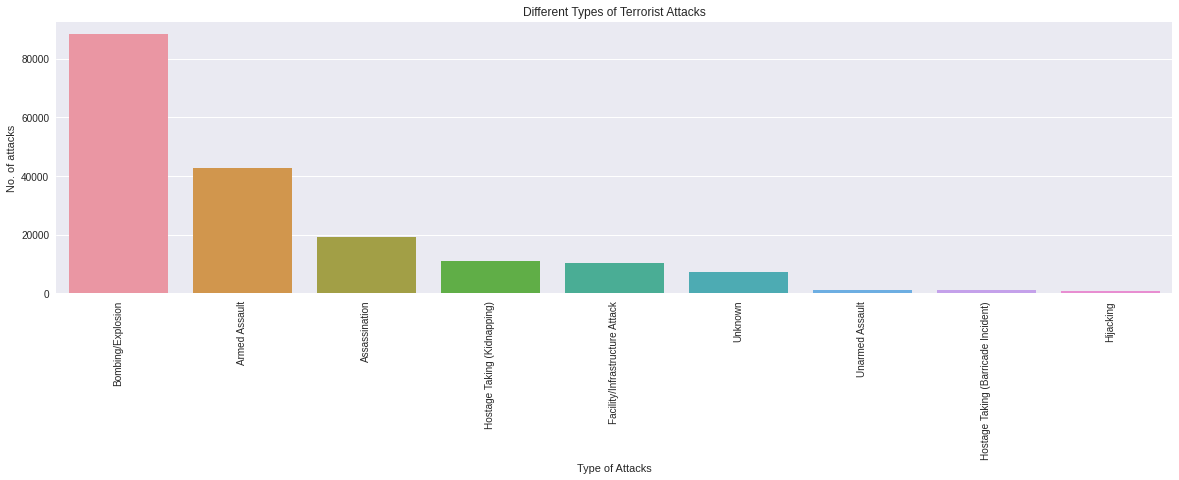

In [87]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['AttackType'].value_counts().index,y=df['AttackType'].value_counts().values)
plt.xlabel('Type of Attacks')
plt.ylabel('No. of attacks')
plt.title('Different Types of Terrorist Attacks')
plt.show()

Most of the terrorist attacks were done with bombing/explosion.

###Targets of Terrorist Attacks

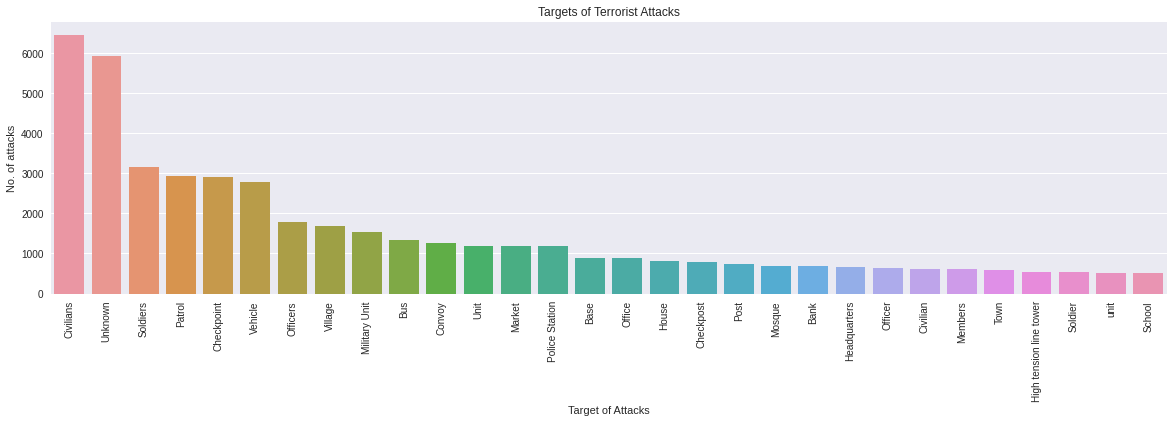

In [88]:
plt.style.use('seaborn')
plt.subplots(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x=df['Target'].value_counts()[:30].index,y=df['Target'].value_counts()[:30].values)
plt.xlabel('Target of Attacks')
plt.ylabel('No. of attacks')
plt.title('Targets of Terrorist Attacks')
plt.show()

Civilians were the top targets of terrorist attacks.


##Conclusion



1.   **Middle East & North Africa** is the region with most terrorist attacks.
>    **Iraq** is the country with most terrorist attacks.

    >    **Baghdad** is the city with most terrorist attacks.

2.   **Taliban** is the most active known Terrorist group.
3.   Most of the terrorist attacks were done with **bombing/explosion**.
4.   **Civilians** were the top targets of terrorist attacks.
5.    The Terrorist Attack is highest in **2014**.

